# Section 5.1.2: Delving deeper into limiting kernels

This page contains simulations in Section 5.1.2.

## Contents

    - Classification of four-class Gaussian mixture


## Classification of four-class Gaussian mixture

In [6]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

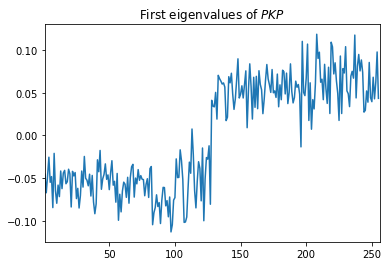

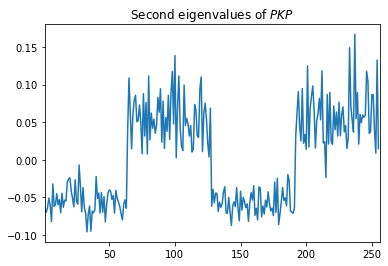

In [8]:
sigma_fun = 'ReLU'
# among mean: 't', 'sign', 'posit', 'erf', 'sin'
# covariance: 'cos', 'abs', 'exp'
# balance: 'ReLU', 'poly2'

n = 256
cs = [1/4,1/4,1/4,1/4]
k = len(cs)

p = 512
means = lambda a : np.concatenate([[5.0*(a<=2),5.0*(a>=3)],np.zeros(p-2)])
covs  = lambda a : np.eye(p)*(1+((a==2) or (a==4))/np.sqrt(p)*15)

X=np.zeros((p,n))
y=np.zeros(n)

for i in range(k):
    X[:,int(np.sum(cs[0:i])*n):int(np.sum(cs[0:i+1])*n)]=np.sqrt(covs(i+1))@np.random.randn(p,int(cs[i]*n))+means(i+1).reshape(p,1)
    y[int(np.sum(cs[0:i])*n):int(np.sum(cs[0:i+1])*n)] = (-1)**i

X = X/np.sqrt(p)

if sigma_fun == 't':
    sig = lambda t : t
    K_xy = lambda x,y : x.T@y

if sigma_fun == 'poly2':
    poly2A = -1/2
    poly2B = 0
    poly2C = 1
    m4 = 3
    m3 = 0
    m2 = 1
    sig = lambda t : poly2A*t**2+poly2B*t+poly2C
    K_xy = lambda x,y : poly2A**2*(m2**2*(2*(x.T@y)**2+(x**2).T@np.ones( (np.size(x,0),np.size(x,0)) )@(y**2))+(m4-3*m2**2)*(x**2).T@(y**2)+poly2B**2*(m2*x.T@y))+poly2A*poly2B*m3*((x**2).T@y+x.T@(y**2))+poly2A*poly2C*m2*np.outer(np.diag(x.T@x),np.diag(y.T@y)) + poly2C**2

if sigma_fun == 'ReLU':
    sig = lambda t : np.maximum(t,0)
    angle_xy = lambda x,y : np.minimum(np.maximum(-1+1e-10,np.diag(1/np.sqrt(np.diag(x.T@x)))@(x.T@y)@np.diag(1/np.sqrt(np.diag(y.T@y)))),1-1e-10)
    K_xy = lambda x,y : np.outer(np.sqrt(np.diag(x.T@x)),np.sqrt(np.diag(y.T@y)))/(2*pi)*(angle_xy(x,y)*np.arccos(-angle_xy(x,y))+np.sqrt(1-angle_xy(x,y)**2))

if sigma_fun == 'sign':
    sig = lambda t : np.sign(t)
    K_xy = lambda x,y : 2/pi*np.arcsin(np.diag(1/np.sqrt(np.diag(x.T@x)))@(x.T@y)@np.diag(1/np.sqrt(np.diag(y.T@y))))

if sigma_fun == 'posit':
    sig = lambda t : (np.sign(t)+1)/2
    K_xy = lambda x,y : 1/2-1/(2*pi)*np.arccos(np.diag(1/np.sqrt(np.diag(x.T@x)))@(x.T@y)@np.diag(1/np.sqrt(np.diag(y.T@y))))

if sigma_fun == 'erf':
    sig = lambda t : scipy.special.erf(t)
    K_xy = lambda x,y : 2/pi*np.arcsin(np.diag(1/sqrt(1+2*np.diag(x.T@x)))@(2*x.T@y)@np.diag(1/np.sqrt(1+2*np.diag(y.T@y))))

if sigma_fun == 'cos':
    sig = lambda t : np.cos(t)
    K_xy = lambda x,y : np.diag(np.exp(-np.diag(x.T@x/2)))@np.cosh(x.T@y)@np.diag(np.exp(-np.diag(y.T@y/2)))

if sigma_fun == 'sin':
    sig = lambda t : np.sin(t)
    K_xy = lambda x,y : np.diag(np.exp(-np.diag(x.T@x/2)))@sinh(x.T@y)@np.diag(np.exp(-np.diag(y.T@y/2)))

if sigma_fun == 'abs':
    sig = lambda t : np.abs(t)
    angle_xy = lambda x,y : np.minimum(np.maximum(-1+1e-10,np.diag(1/np.sqrt(np.diag(x.T@x)))@(x.T@y)@np.diag(1/np.sqrt(np.diag(y.T@y)))),1-1e-10)
    K_xy = lambda x,y : np.outer(2*np.sqrt(np.diag(x.T@x)),np.sqrt(np.diag(y.T@y)))/pi*(angle_xy(x,y)*(np.arccos(-angle_xy(x,y))-pi/2)+np.sqrt(1-angle_xy(x,y)**2))

if sigma_fun == 'exp':
    sig = lambda t : np.exp(-t**2/2)
    K_xy = lambda x,y : 1/np.sqrt( 1 + (x**2).T@np.ones( (size(x,0),size(x,0)) )@(y**2) + np.diag(x.T@x).reshape( (size(x,0),1) ) + np.diag(y.T@y).reshape( (1,size(y,0)) ) - (x.T@y)**2)

P = np.eye(n) - np.ones((n,n))/n

K = K_xy(X,X)
PKP = P@K@P
U_PKP=np.linalg.eig(PKP)[1]

plt.figure()
plt.plot(U_PKP[:,0])
plt.gca().set_xlim([1,n])
plt.title(r'First eigenvalues of $PKP$')

plt.figure()
plt.plot(U_PKP[:,1]);
plt.gca().set_xlim([1,n])
plt.title(r'Second eigenvalues of $PKP$')
_ = plt.show()